In [2]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [4]:
from keras.datasets import mnist

In [6]:
(X_train_image,y_train_label),(X_test_image,y_test_label) = mnist.load_data()

11493376/11490434 [==============================] - 47s 4us/step


In [27]:
print(len(X_train_image))

60000


In [8]:
print(len(X_test_image))

10000


In [22]:
print(X_train_image[0].shape)
print(y_train_label[0])

(28, 28)
5


In [23]:
import matplotlib.pyplot as plt

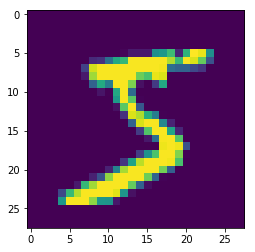

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [32]:
plt.imshow(X_train_image[0])
plt.show()
X_train_image[1]

In [33]:
y_train_label[0]

5

In [42]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = "label = " + str(labels[idx])
        if len(prediction)>0:
            title += ",prediction="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

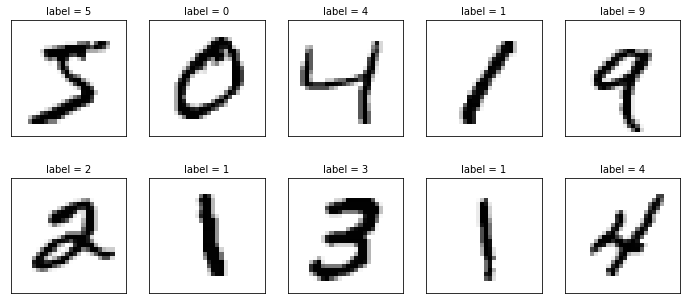

In [43]:
plot_images_labels_prediction(X_train_image,y_train_label,[],0,10)

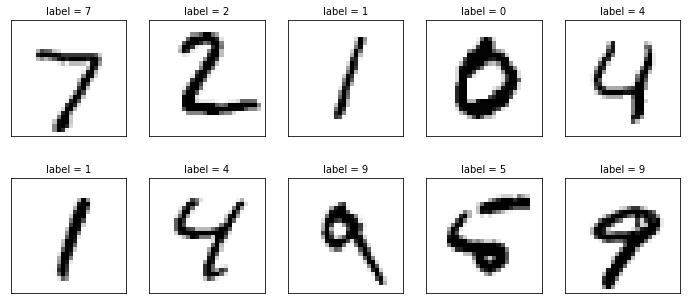

In [44]:
plot_images_labels_prediction(X_test_image,y_test_label,[],0,10)

# Multilayer Perceptron

In [48]:
x_Train = X_train_image.reshape(60000,784).astype('float32')
x_Test = X_test_image.reshape(10000,784).astype('float32')
print(x_Train.shape)
print(x_Test.shape)

(60000, 784)
(10000, 784)


In [61]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [62]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [63]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [64]:
y_TrainOneHot.shape

(60000, 10)

In [65]:
y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [66]:
from keras.models import Sequential
from keras.layers import Dense

In [67]:
model = Sequential()

In [68]:
model.add(Dense(units=256,input_dim=784,kernel_initializer='normal',activation='relu'))

In [69]:
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [70]:
print(model.summary()) 
#dense_1_param: 784*256+256
#dense_2_param: 256*10+10

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',metrics=['accuracy'])

In [72]:
train_history = model.fit(x = x_Train_normalize,
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs=10,
                          batch_size = 200,
                          verbose = 2
                          )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4488 - acc: 0.8790 - val_loss: 0.2242 - val_acc: 0.9394
Epoch 2/10
 - 1s - loss: 0.1956 - acc: 0.9441 - val_loss: 0.1611 - val_acc: 0.9557
Epoch 3/10
 - 1s - loss: 0.1371 - acc: 0.9612 - val_loss: 0.1278 - val_acc: 0.9630
Epoch 4/10
 - 1s - loss: 0.1033 - acc: 0.9704 - val_loss: 0.1151 - val_acc: 0.9658
Epoch 5/10
 - 1s - loss: 0.0815 - acc: 0.9772 - val_loss: 0.1005 - val_acc: 0.9693
Epoch 6/10
 - 1s - loss: 0.0659 - acc: 0.9817 - val_loss: 0.0987 - val_acc: 0.9694
Epoch 7/10
 - 1s - loss: 0.0540 - acc: 0.9852 - val_loss: 0.0869 - val_acc: 0.9728
Epoch 8/10
 - 1s - loss: 0.0450 - acc: 0.9879 - val_loss: 0.0826 - val_acc: 0.9758
Epoch 9/10
 - 1s - loss: 0.0361 - acc: 0.9908 - val_loss: 0.0802 - val_acc: 0.9745
Epoch 10/10
 - 1s - loss: 0.0302 - acc: 0.9924 - val_loss: 0.0809 - val_acc: 0.9749


In [73]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

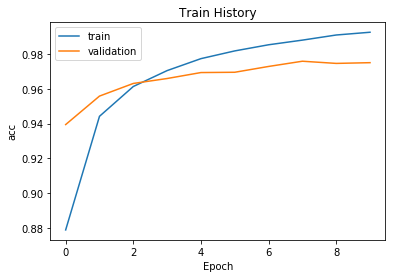

In [74]:
show_train_history(train_history,'acc','val_acc')

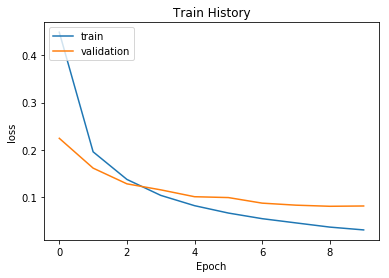

In [75]:
show_train_history(train_history,'loss','val_loss')

In [77]:
scores = model.evaluate(x_Test_normalize,y_TestOneHot)
print('accurary = ',scores[1])

10000/10000 [==============================] - 0s 16us/step
accurary =  0.9772


In [78]:
prediction = model.predict_classes(x_Test)

In [79]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

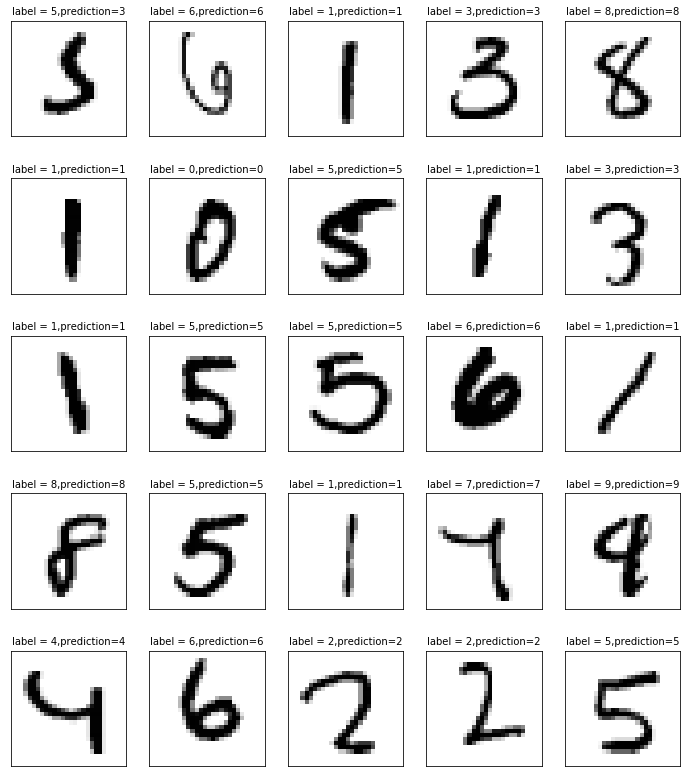

In [82]:
plot_images_labels_prediction(X_test_image,y_test_label,prediction,idx=340,num=25)

# error matrix

In [84]:
pd.crosstab(y_test_label,prediction,rownames = ['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,0,0,2,1,1,2,1,1,3
1,0,1114,3,1,0,0,4,1,12,0
2,5,0,1008,3,1,0,2,5,8,0
3,0,0,2,989,0,3,0,4,5,7
4,1,0,3,1,959,0,5,2,1,10
5,3,0,0,9,1,860,5,2,8,4
6,7,2,2,1,4,3,936,0,3,0
7,3,2,9,6,1,0,0,998,2,7
8,5,0,4,5,3,1,2,2,949,3


In [85]:
df = pd.DataFrame({'label':y_test_label,'prediction':prediction})
df

,label,prediction
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


In [86]:
df[(df.label!=df.prediction)]

,label,prediction
8,5,6
247,4,2
259,6,0
321,2,7
340,5,3
381,3,7
445,6,0
495,8,2
582,8,2
619,1,8


In [101]:
from keras.layers import Dropout
model2 = Sequential()

In [102]:
model2.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))

In [103]:
model2.add(Dropout(0.5))

In [104]:
model2.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

In [105]:
print(model2.summary()) 
model2.compile(loss='categorical_crossentropy',
             optimizer = 'adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
train_history = model2.fit(x = x_Train_normalize,
                          y = y_TrainOneHot,
                          validation_split = 0.2,
                          epochs=10,
                          batch_size = 200,
                          verbose = 2
                          )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.3639 - acc: 0.8919 - val_loss: 0.1604 - val_acc: 0.9552
Epoch 2/10
 - 4s - loss: 0.1629 - acc: 0.9524 - val_loss: 0.1171 - val_acc: 0.9662
Epoch 3/10
 - 4s - loss: 0.1155 - acc: 0.9664 - val_loss: 0.0966 - val_acc: 0.9712
Epoch 4/10
 - 4s - loss: 0.0941 - acc: 0.9719 - val_loss: 0.0862 - val_acc: 0.9745
Epoch 5/10
 - 4s - loss: 0.0775 - acc: 0.9762 - val_loss: 0.0822 - val_acc: 0.9756
Epoch 6/10
 - 4s - loss: 0.0639 - acc: 0.9809 - val_loss: 0.0738 - val_acc: 0.9783
Epoch 7/10
 - 4s - loss: 0.0549 - acc: 0.9832 - val_loss: 0.0722 - val_acc: 0.9773
Epoch 8/10
 - 4s - loss: 0.0479 - acc: 0.9852 - val_loss: 0.0698 - val_acc: 0.9789
Epoch 9/10
 - 4s - loss: 0.0428 - acc: 0.9867 - val_loss: 0.0700 - val_acc: 0.9785
Epoch 10/10
 - 4s - loss: 0.0369 - acc: 0.9880 - val_loss: 0.0645 - val_acc: 0.9801


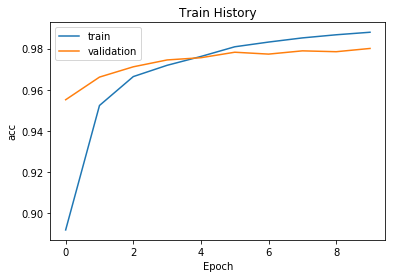

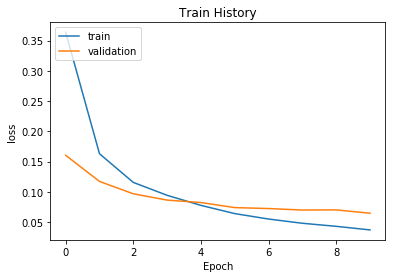

In [108]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [107]:
scores = model2.evaluate(x_Test_normalize,y_TestOneHot)
print('accurary = ',scores[1])

10000/10000 [==============================] - 0s 44us/step
accurary =  0.9812
